In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('realistic_sales_data.csv')
df.head()

,customer,product,quantity,price,sale_date
0,Julia Greene,Smartwatch,3,200,2025-01-23
1,Mr. Julian Mccullough DDS,Tablet,5,300,2025-06-18
2,Carlos Jenkins,Smartwatch,5,200,2025-01-02
3,Bonnie Gardner,Headphones,2,100,2025-03-19
4,Kim Lee,Smartwatch,1,200,2025-05-07


In [5]:
conn=sqlite3.connect(":memory:")

In [7]:
df.to_sql("sales",conn,index=False,if_exists="replace")

100

In [9]:
query="""select product,
sum(quantity) as total_quantity,
sum(quantity*price) as total_revenue
from sales
group by product
"""
df_summary=pd.read_sql_query(query,conn)
print(df_summary)

      product  total_quantity  total_revenue
0  Headphones              80           8000
1      Laptop              61          42700
2  Smartphone              75          37500
3  Smartwatch              69          13800
4      Tablet              27           8100


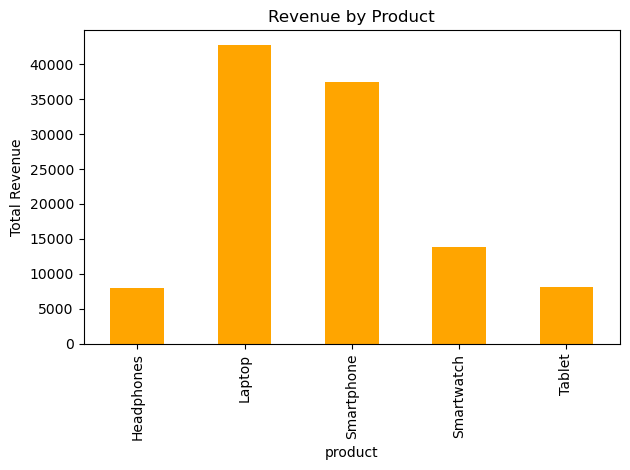

In [11]:
df_summary.plot(kind='bar', x='product', y='total_revenue', color='orange', legend= False)
plt.title("Revenue by Product")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

In [13]:
query="""
select customer,sum(quantity)as total_aqty
from sales
group by customer
"""
df_customer_summary=pd.read_sql_query(query, conn)
print(df_customer_summary.head())

           customer  total_aqty
0    Aaron Cummings           3
1  Alison Maldonado           2
2   Allison Osborne           3
3     Amanda Barber           2
4          Amy Cook           5


In [15]:
query="""
select strftime('%y-%m', sale_date) as month,
sum(quantity*price) as revenue 
from sales
group by month
order by month
"""
df_monthly_summary=pd.read_sql_query(query, conn)
print(df_monthly_summary.head())

  month  revenue
0  None   110100


In [17]:
query="""
select avg(quantity* price ) as avg_order_revenue
from sales
"""
df_customer_summary=pd.read_sql_query(query, conn)
print(df_customer_summary.head())

   avg_order_revenue
0             1101.0


In [29]:
query="""
select customer, product,
sum( quantity * price) as revenue
from sales
group by customer, product
order by revenue desc
"""
df_summary=pd.read_sql_query(query,conn)
print(df_summary)

              customer     product  revenue
0        Michael Lewis      Laptop     3500
1          Paula Smith      Laptop     3500
2        Timothy Smith      Laptop     3500
3   Charles Montgomery      Laptop     2800
4            Eric Ross      Laptop     2800
..                 ...         ...      ...
95       Marie Oconnor  Smartwatch      200
96         Samuel Ford  Smartwatch      200
97     Brandon Roberts  Headphones      100
98       Cheryl Dunlap  Headphones      100
99          Todd Yates  Headphones      100

[100 rows x 3 columns]


In [33]:
query="""
select month, product, revenue from(
select strftime('%y-%m',
Date(sale_date)) as month,
product,
sum( quantity * price) as revenue,
rank() over (partition by strftime('%y-%m', Date(sale_date))
order by sum(quantity * price)desc) as rnk
from sales
group by month, product)
where rnk =1 
"""
df_summary=pd.read_sql_query(query,conn)
print(df_summary)

  month product  revenue
0  None  Laptop    42700
